# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Loading Data

In [2]:
data1 = pd.read_csv('/content/Data/Unemployment in India.csv')
data1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
data2 = pd.read_csv('/content/Data/Unemployment_Rate_upto_11_2020.csv')
data2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# Exploring Data

In [4]:
data1['Area'].value_counts()


,count
Area,
Urban,381
Rural,359


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
data1.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


**This Data has too many missing values so let's start clean**

In [7]:
# Conveting Date into datetime
data1['Date'] = pd.to_datetime(data1[' Date'])

# Drop the Date from the data
data1.drop(' Date',axis = 1,inplace = True)


/tmp/ipython-input-7-2651138286.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data1['Date'] = pd.to_datetime(data1[' Date'])


In [8]:
# Handling missing values
data1.dropna(inplace= True)

In [9]:
# Check The missing Values
data1.isnull().sum()

,0
Region,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0
Date,0


In [12]:
# Check The missing Values
data1.isnull().sum()

,0
Region,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


/tmp/ipython-input-13-91081579.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=data1, ci=None, palette="magma")
/tmp/ipython-input-13-91081579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=data1, ci=None, palette="magma")


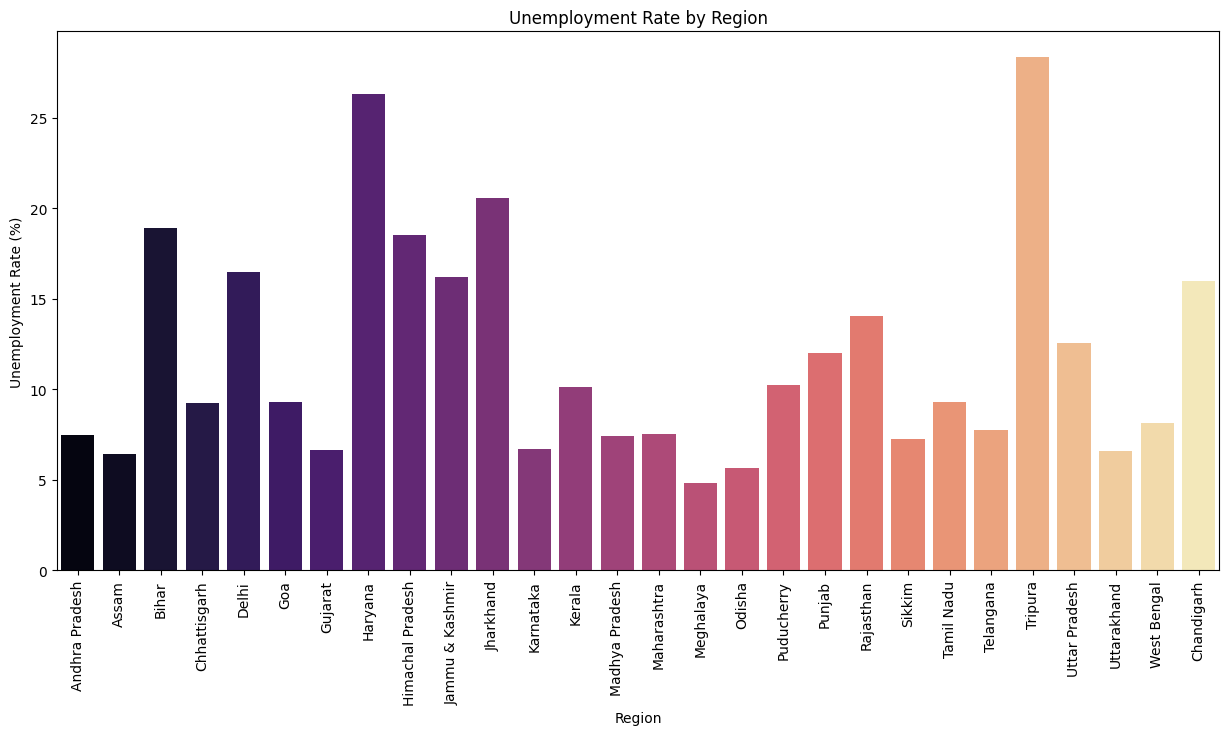

In [13]:
# 1. Unemployment Rate Distribution by Region
data1.columns = data1.columns.str.strip()
plt.figure(figsize=(15, 7))
sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=data1, ci=None, palette="magma")
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Region")
plt.show()

/tmp/ipython-input-14-1773377841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="Estimated Labour Participation Rate (%)", data=data1, palette="Spectral")


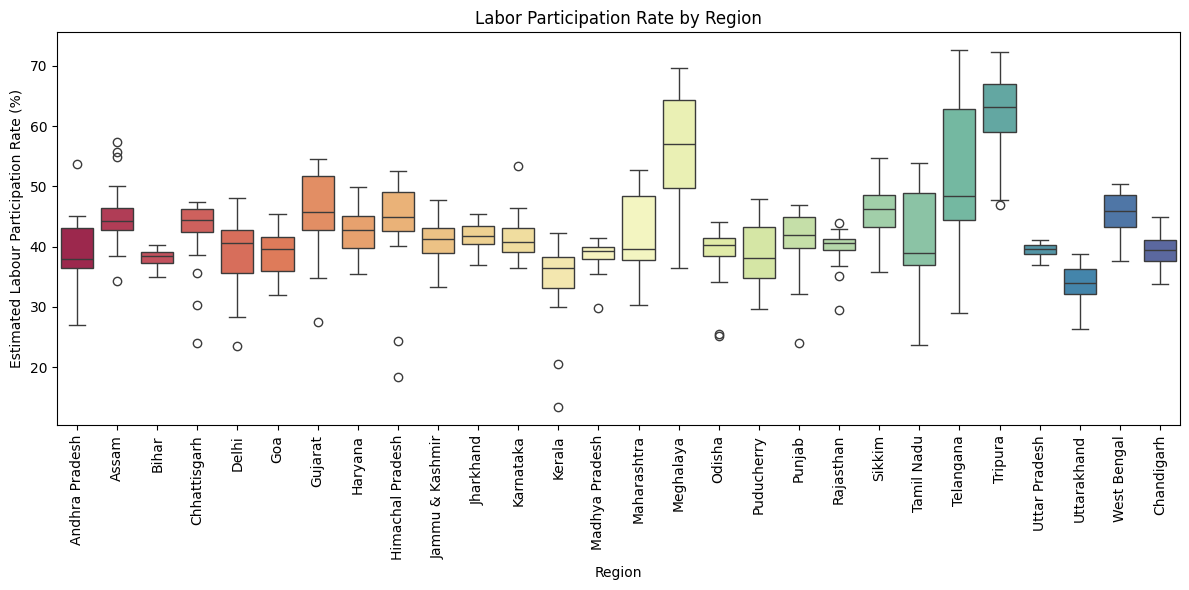

In [14]:
# 2. Box Plot for Labor Participation Rate
data1.columns = data1.columns.str.strip()
plt.figure(figsize=(12, 6))
sns.boxplot(x="Region", y="Estimated Labour Participation Rate (%)", data=data1, palette="Spectral")
plt.title("Labor Participation Rate by Region")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
#Average Metrics by Region
avg_metrics = data1.groupby('Region')[['Estimated Unemployment Rate (%)',
                                       'Estimated Labour Participation Rate (%)']].mean()
avg_metrics

,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%)
Region,,
Andhra Pradesh,7.477143,39.375714
Assam,6.428077,44.868462
Bihar,18.918214,38.153929
Chandigarh,15.991667,39.336667
Chhattisgarh,9.240357,42.810714
Delhi,16.495357,38.929643
Goa,9.274167,39.249583
Gujarat,6.663929,46.101071
Haryana,26.283214,42.737143


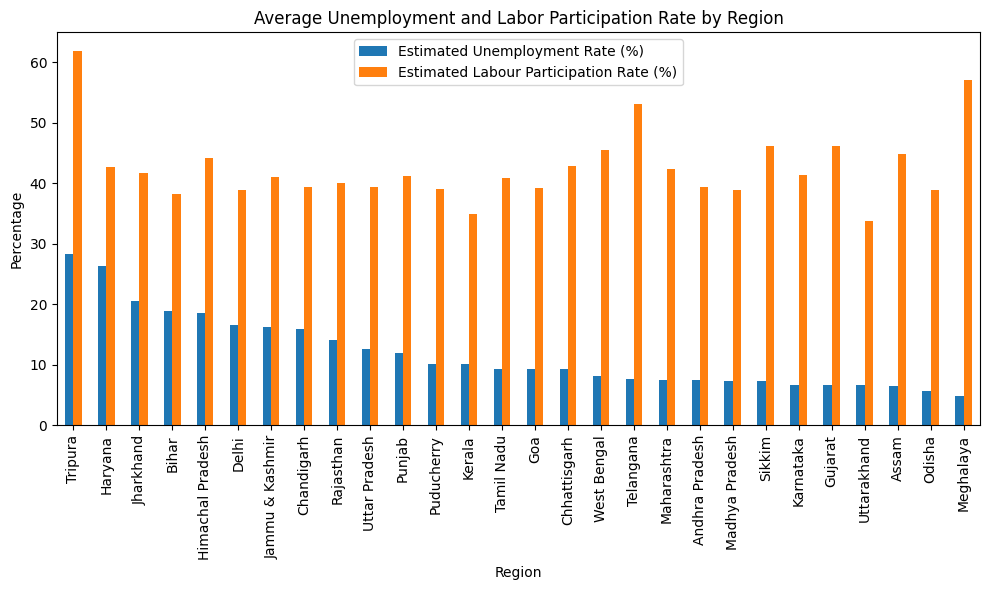

In [16]:
# 3. Average Unemployment Rate Plot
avg_metrics.sort_values(by="Estimated Unemployment Rate (%)", ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Average Unemployment and Labor Participation Rate by Region")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

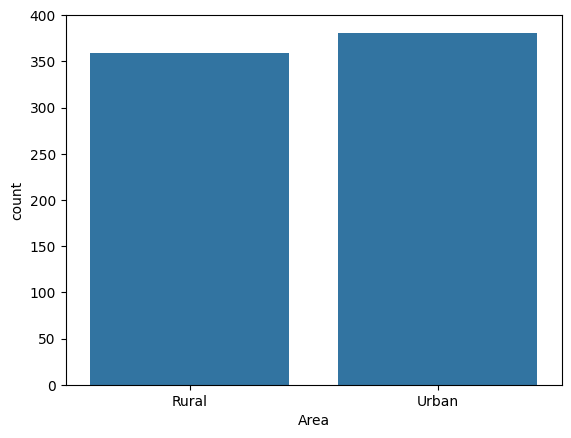

In [17]:
#4. Area-wise Data
data1["Area"].value_counts()
sns.countplot(x="Area",data=data1)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

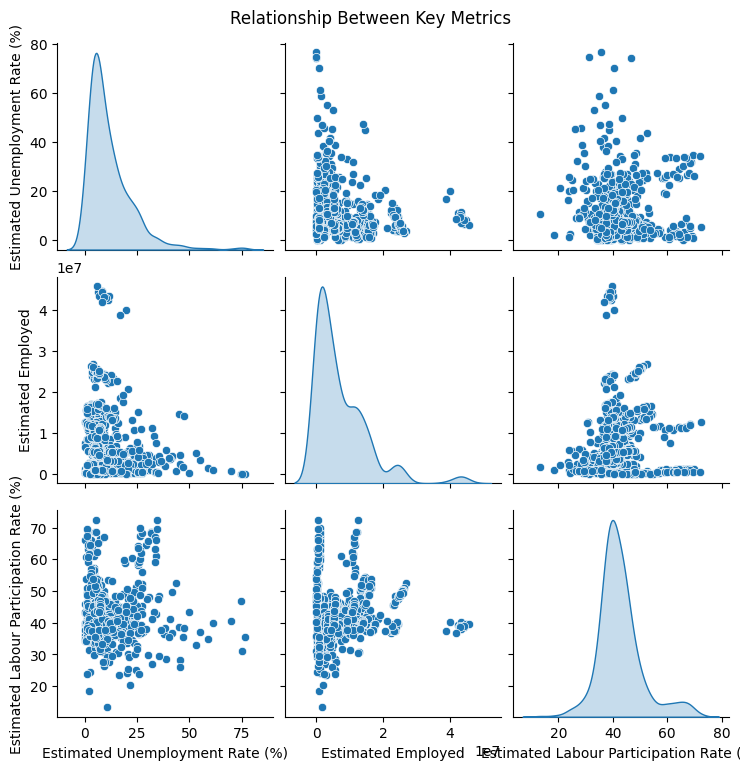

In [18]:
# 5. Pair Plot for Key Metrics
pair_data = data1[["Estimated Unemployment Rate (%)", "Estimated Employed",
                   "Estimated Labour Participation Rate (%)"]]
sns.pairplot(pair_data, diag_kind="kde", palette="husl", markers="o")
plt.suptitle("Relationship Between Key Metrics", y=1.02)
plt.show()

**Srcond Data**

In [19]:
data2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [21]:
data2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [22]:
data2.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [26]:
# Converting 'Date' column to datetime
data2['Date'] = pd.to_datetime(data2[' Date'], errors='coerce')
data2 = data2.dropna(subset=['Date'])

In [28]:
# Selecting Data from Covid-19 in 2020
covid_data = data2[data2['Date'].dt.year == 2020]
covid_data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Date
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740,2020-01-31
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740,2020-02-29
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740,2020-03-31
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740,2020-04-30
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740,2020-05-31
...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,2020-06-30
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,2020-07-31
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,2020-08-31
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,2020-09-30


In [32]:
covid_data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'Date'],
      dtype='object')

In [40]:
# Clean column names
covid_data.columns = covid_data.columns.str.strip()

# Remove duplicate columns by name
covid_data = covid_data.loc[:, ~covid_data.columns.duplicated()]


In [41]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'], errors='coerce')


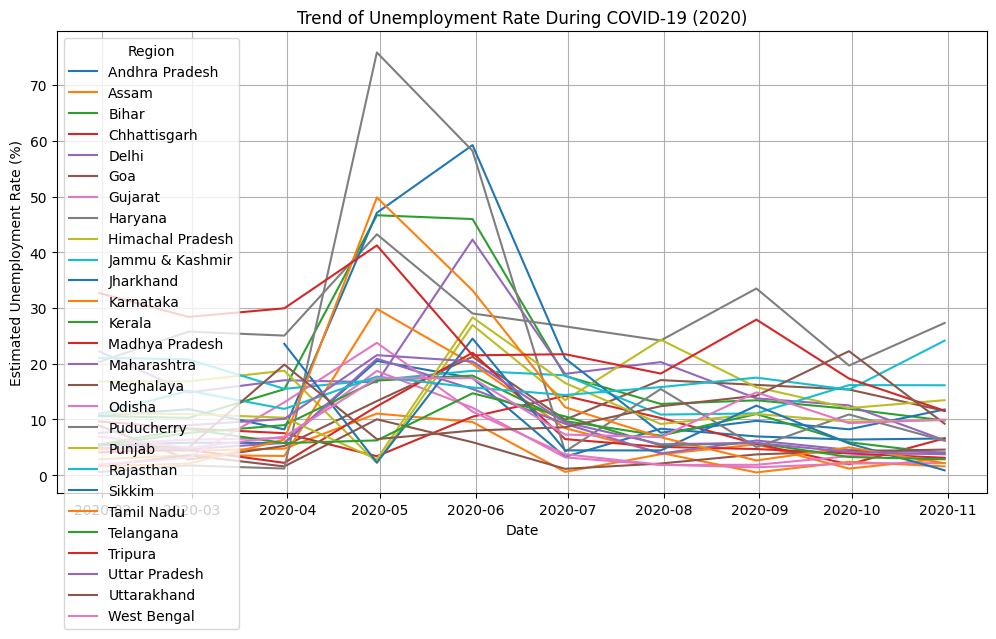

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=covid_data,
    x='Date',
    y='Estimated Unemployment Rate (%)',
    hue='Region',
    palette='tab10'
)
plt.title("Trend of Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.grid(True)
plt.show()

/tmp/ipython-input-44-3197354915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=covid_data, x='Region', y='Estimated Unemployment Rate (%)', palette='Set2')


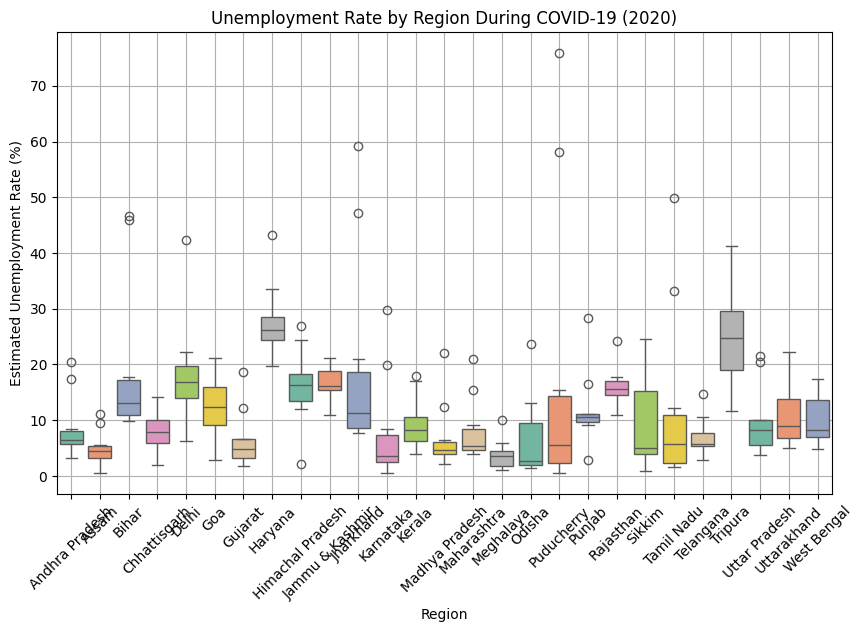

In [44]:
# QUESTION 2: Which regions were most affected during the COVID-19 pandemic?
plt.figure(figsize=(10, 6))
sns.boxplot(data=covid_data, x='Region', y='Estimated Unemployment Rate (%)', palette='Set2')
plt.title("Unemployment Rate by Region During COVID-19 (2020)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

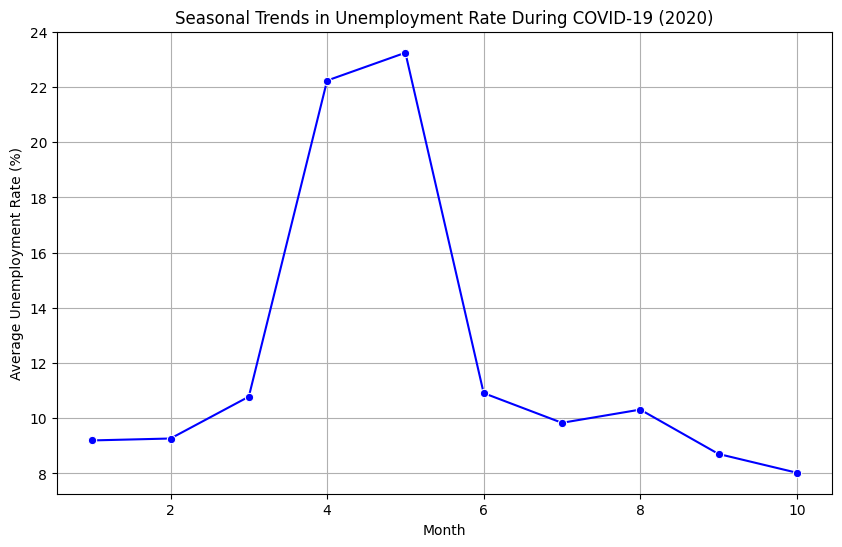

In [47]:
# QUESTION 3: Were there any seasonal trends in unemployment during the pandemic?
covid_data['Month'] = covid_data['Date'].dt.month
monthly_avg = covid_data.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Estimated Unemployment Rate (%)', data=monthly_avg, marker='o', color='blue')
plt.title("Seasonal Trends in Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.grid(True)
plt.show()